In [23]:
import os

#Kaggle folder
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# kaggle.json ko manually specify karo
kaggle_json_path = "/content/kaggle.json"

# kaggle.json ko right location par move karo
os.rename(kaggle_json_path, os.path.expanduser('~/.kaggle/kaggle.json'))

# Permissions set karo (Windows compatible)
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)
from tensorflow.keras.callbacks import EarlyStopping

# New Section

In [24]:
!kaggle datasets download -d tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
import zipfile

# Path of zip file
zip_path = "/content/cat-and-dog.zip"

# Extract folder path
extract_path = "/content/cat-and-dog"

# Unzipping
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [26]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [27]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_4 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [28]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [29]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [31]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/cat-and-dog/training_set/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/cat-and-dog/test_set/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [33]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [40]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [41]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 108ms/step - accuracy: 0.8259 - loss: 0.3922 - val_accuracy: 0.9086 - val_loss: 0.2183
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - accuracy: 0.9323 - loss: 0.1687 - val_accuracy: 0.9189 - val_loss: 0.1883
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.9513 - loss: 0.1163 - val_accuracy: 0.9145 - val_loss: 0.2110
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.9726 - loss: 0.0813 - val_accuracy: 0.9095 - val_loss: 0.2307
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 27s 110ms/step - accuracy: 0.9825 - loss: 0.0589 - val_accuracy: 0.9288 - val_loss: 0.1722
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.9885 - loss: 0.0392 - val_accuracy: 0.9071 - val_loss: 0.2612
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - accuracy: 0.9951 - loss: 0.0267 - val_accuracy: 0.9273 - val_loss: 0.2021
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.9977 - loss: 0

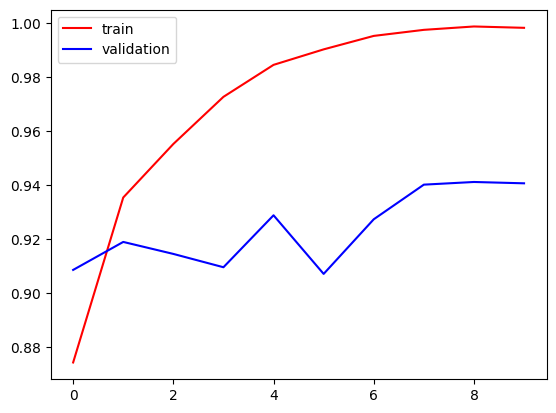

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

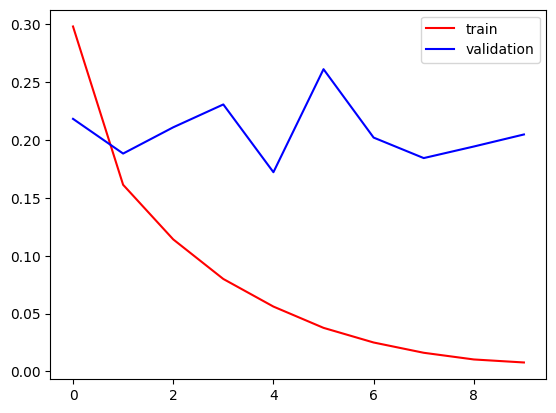

In [43]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [44]:
import cv2

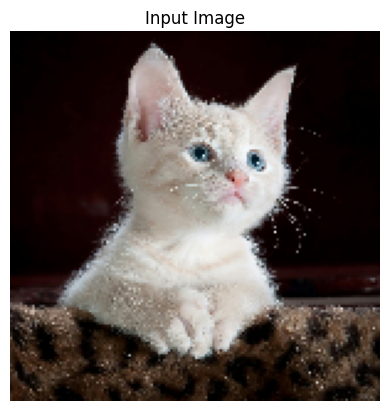

In [47]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = '/content/pexels-pixabay-45201.jpg'  # Make sure to update this path

# Load  image using OpenCV
image = cv2.imread(image_path)

# Convert BGR to RGB (since OpenCV loads images in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image  (required for VGG16)
image = tf.image.resize(image, [150, 150,])

# Normalize the image (scale pixel values to [0, 1])
image = image / 255.0

# Add batch dimension (the model expects a batch of images)
image = np.expand_dims(image, axis=0)

# Display the image (optional)
plt.imshow(image[0])
plt.title("Input Image")
plt.axis("off")
plt.show()


In [48]:
# Assuming your model is already trained and loaded
prediction = model.predict(image)

# For binary classification (Cat or Dog), VGG16 typically gives an output between 0 and 1
# The output will be the probability of belonging to the "Dog" class if you trained it for binary classification.

if prediction[0] > 0.5:
    print(f"Predicted Class: Dog with confidence {prediction[0][0]}")
else:
    print(f"Predicted Class: Cat with confidence {1 - prediction[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: Cat with confidence 0.9999997370025255


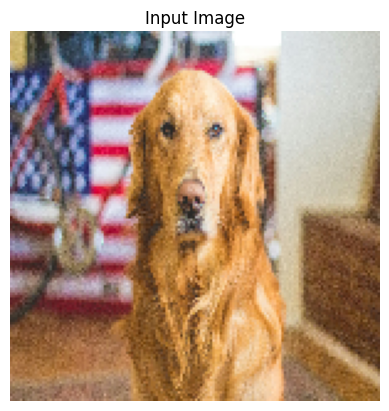

In [49]:
# Path to your downloaded image (replace this with your actual path)
image_path = '/content/caleb-fisher-pgUbpDLJh3E-unsplash.jpg'  # Make sure to update this path

# Load the image using OpenCV
image = cv2.imread(image_path)

# Convert BGR to RGB (since OpenCV loads images in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image (required for VGG16)
image = tf.image.resize(image, [150, 150,])

# Normalize the image (scale pixel values to [0, 1])
image = image / 255.0

# Add batch dimension (the model expects a batch of images)
image = np.expand_dims(image, axis=0)

# Display the image (optional)
plt.imshow(image[0])
plt.title("Input Image")
plt.axis("off")
plt.show()


In [50]:
# Assuming your model is already trained and loaded
prediction = model.predict(image)

# For binary classification (Cat or Dog), VGG16 typically gives an output between 0 and 1
# The output will be the probability of belonging to the "Dog" class if you trained it for binary classification.

if prediction[0] > 0.5:
    print(f"Predicted Class: Dog with confidence {prediction[0][0]}")
else:
    print(f"Predicted Class: Cat with confidence {1 - prediction[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class: Dog with confidence 1.0
